In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Câu hỏi: Trong năm, thời gian nào được nhiều người đăng bài nhất? 

- **Câu hỏi đặt ra: Trong năm, thời gian nào được nhiều người đăng bài nhất?**
  - Bảng dữ liệu cần sử dụng: `track`
  - Các trường cần sử dụng: `created_at`
  - Hướng giải quyết: Để có thể giải quyết câu hỏi, sẽ thống kê số bài hát mà người dùng đăng theo mỗi tháng dựa trên dữ liệu đã thu thập được. Trong bài này sẽ sử dụng `bar chart` để trực quan hoá dữ liệu. 
  - Dự đoán kết quả: Số bài hát mà người dùng đăng theo mỗi tháng sẽ không chênh lệch nhau quá nhiều. Hay nói cách khác, trong năm, số bài hát được đăng rải đều mỗi tháng.  

## Tiền xử lý dữ liệu
Với câu hỏi trên, chúng ta sẽ tập trung xử lý: Tập dữ liệu `track` với trường `created_at`

Tiến hành load dữ liệu từ file `csv` và lọc ra các trường cần thiết.

In [2]:
df_track = pd.read_csv('./track.csv')
df_track = df_track[['created_at']].reset_index(drop=True)

In [3]:
df_track

,created_at
0,2021-10-29T08:43:42Z
1,2021-10-15T09:37:00Z
2,2021-09-24T08:55:16Z
3,2021-09-17T07:35:14Z
4,2021-09-03T09:40:32Z
...,...
633011,2016-06-03T00:19:48Z
633012,2016-10-07T00:10:43Z
633013,2017-08-11T00:28:14Z
633014,2017-09-21T22:34:33Z


Vì trường `created at` được tạo mặc định bởi SoundCloud mỗi khi người dùng đăng bất kỳ bài hát nào, nên trường này không có missing_values. Vì thế chúng ta không xử lý drop missing_values ở trường `created at`

## Phân tích dữ liệu 
Dựa vào trường `created_at`, ta sẽ xem xét số bài hát được đăng theo tháng. 
Các bước thực hiện:
1. Tạo list `month_list` liệt kê số tháng có trong năm theo dạng '-01-'. Vì trường `created_at` có cách ghi kiểu dữ liệu ngày giờ theo chuẩn thời gian ISO 8601 (Ex: 2016-10-07T00:10:43Z), nên để lấy được tháng phải chọn cách lấy theo tháng như vậy ('-01-').
2. Nhóm dữ liệu theo các tháng được liệt kê trong `month_list`. 
3. Với mỗi tháng, đếm số bài hát được đăng qua từng năm. 
4. Sử dụng **Bar chart** để trực quan hóa sự thay đổi này.

In [5]:
#Tạo list number_of_songs
number_of_songs = [] 

#Tạo month_list để liệt kê các tháng theo dạng '-01-' 
month_list = ['-01-','-02-','-03-','-04-','-05-','-06-','-07-','-08-','-09-','-10-','-11-','-12-']

#Đếm số bài hát được đăng qua trường 'created_at' trong tập dữ liệu track
for month in month_list:
    track = df_track.loc[df_track['created_at'].str.contains(month, case=False)]
    number_of_songs.append(len(track.index))

In [6]:
#Tạo data frame với 2 trường month và number_of_songs để thống kê số bài hát được đăng theo tháng 
month = ['01','02','03','04','05','06','07','08','09','10','11','12']
data_df = pd.DataFrame(list(zip(month, number_of_songs)),
               columns =['Month', 'Number of Songs'])
data_df

,Month,Number of Songs
0,01,51559
1,02,47795
2,03,53799
3,04,52697
4,05,55785
5,06,53347
6,07,55092
7,08,54145
8,09,55102
9,10,58389


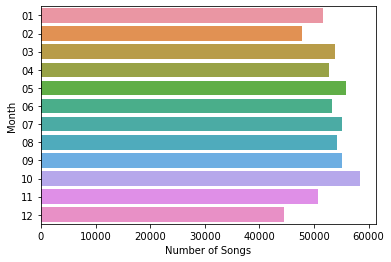

In [8]:
#Sử dụng bar chart để trực quan hoá dữ liệu 
ax = sns.barplot(x="Number of Songs", y="Month", data=data_df[["Month","Number of Songs"]],orient = "h")

Với các kết quả thu được, chúng ta có các nhận xét sau:
- Khoảng thời gian từ tháng 5 đến tháng 10, có nhiều người đăng bài nhất. 
- Số bài hát được đăng trong mỗi tháng không có sự chênh lệch nhau quá nhiều (~40,000 - 60,000 bài hát trong mỗi tháng). 

# Câu hỏi: Dòng nhạc nào được nhiều người thích nhất 

- Tập dữ liệu sử dụng: `track`
- Trường cần sử dụng: `genre`, `likes_count`
- Kiểu dữ liệu mong đợi ở các trường: 
   - `genre`: strings 
   - `likes_count`: numerical 
- Vấn đề đặt ra: `genre` chứa missing values do người dùng tự định nghĩa genre và có thể không nhập. 
- Hướng giải quyết: Sử dụng **Bar chart** để trực quan hoá dữ liệu là dòng nhạc với số lượt thích tương ứng. 
- Dự đoán kết quả: Có thể là HipHop & Rap, Electronic vì 2 dòng nhạc này phổ biến không chỉ trên SoundCloud mà còn ở bất cứ platform nghe nhạc nào. 

## Tiền xử lý dữ liệu
Với câu hỏi trên, chúng ta sẽ tập trung xử lý: Tập dữ liệu `track` với trường `genre` và `likes_count`

Tiến hành load dữ liệu từ file `csv` và lọc ra các trường cần thiết.

In [9]:
df_track = pd.read_csv('./track.csv')
df_track = df_track[['genre','likes_count']].reset_index(drop=True)
df_track

,genre,likes_count
0,Dance & EDM,49.0
1,Dance & EDM,87.0
2,Chill Out,129.0
3,Dance & EDM,380.0
4,Dance & EDM,356.0
...,...,...
633011,Tecnologia,NaN
633012,Negócio,NaN
633013,Negócios,NaN
633014,Negócios,NaN


### Giá trị thiếu (Missing Values)
Tiếp theo, chúng ta sẽ tiến hành xử lý dữ liệu thiếu. Đầu tiên, chúng ta sẽ xem xét xem trường nào bị thiếu, thiếu bao nhiêu và chiếm bao nhiêu phần trăm dữ liệu.

In [10]:
# Track
track_mv = pd.DataFrame()
track_mv['Số lượng'] = df_track.isna().sum().values
track_mv['Phần trăm'] = track_mv['Số lượng'].apply(lambda val: val/df_track.shape[0] * 100)
track_mv.index = df_track.columns

track_mv

,Số lượng,Phần trăm
genre,109085,17.232582
likes_count,33955,5.364003


Tiếp theo, chúng ta sẽ tiến hành phân tích các trường và đưa ra cách giải quyết phù hợp:
- `genre`: thuộc kiểu categorical $\rightarrow$ chỉ chiếm khoảng 17% và chúng ta không thể phân tích gì được với thể loại nhạc không xác định, cho nên với trường này chúng ta sẽ tiên hành drop các missing values.
- `likes_count`: thuộc kiểu numerical $\rightarrow$ tương tự như trường `genre`, chúng ta sẽ drop các missing values.

In [11]:
# Drop mv ở trường genre và playback_count
df_track.dropna(inplace=True) 

In [12]:
# Track
track_mv = pd.DataFrame()
track_mv['Số lượng'] = df_track.isna().sum().values
track_mv['Phần trăm'] = track_mv['Số lượng'].apply(lambda val: val/df_track.shape[0] * 100)
track_mv.index = df_track.columns

track_mv

,Số lượng,Phần trăm
genre,0,0.0
likes_count,0,0.0


### Xử lý dữ liệu nhiễu
Chúng ta xem qua dữ liệu trường `genre` của `df_track` 

In [14]:
df_track.genre.value_counts()

Electronic        42472
Dance & EDM       37444
House             31728
Techno            20481
Hip-hop & Rap     18706
                  ...  
Sakuzyo               1
DripHop               1
pharaoh_flip          1
Jentrify              1
хорошая музыка        1
Name: genre, Length: 41729, dtype: int64

Ta nhận thấy có một vài trường hợp người dùng tự định nghĩa genre của bài hát, nên ta sẽ sử dụng các genre có trên **3000** record. 

In [16]:
#Tiến hành filter dữ liệu, chỉ lấy các genre có trên 3000 records và lưu vào df mới có tên là popular_genre
all_genre = df_track["genre"].value_counts()
all_genre = all_genre.reset_index()
all_genre.columns = ['All_Genre','counts']
popular_genre=all_genre[all_genre.counts > 3000].copy()
popular_genre

,All_Genre,counts
0,Electronic,42472
1,Dance & EDM,37444
2,House,31728
3,Techno,20481
4,Hip-hop & Rap,18706
5,Dubstep,16621
6,Deep House,15891
7,Drum & Bass,15283
8,Dance,13457
9,Trap,10111


Ta sẽ sử dụng df `popular_genre` để xử lý câu hỏi được đặt ra 

## Phân tích dữ liệu 
Dựa vào trường `genre` và `likes_count`, ta sẽ xem xét dòng nhạc nào có nhiều lượt thích nhất, từ đó sẽ kết luận được dòng nhạc nào sẽ có nhiều người thích. 

Các bước thực hiện:
1. Đầu tiên, ta tạo list `genre_list` được chuyển đổi từ df `popular_genre`. 
2. Sử dụng `genre_list` để tính tổng số lượt likes của của từng `genre` dựa trên `likes_count` trong df `df_track` ban đầu. 
3. Sử dụng **Bar chart** để trực quan hoá dữ liệu

In [17]:
#Tạo list genre_list
genre_list = popular_genre['All_Genre'].tolist() 
genre_list

['Electronic',
 'Dance & EDM',
 'House',
 'Techno',
 'Hip-hop & Rap',
 'Dubstep',
 'Deep House',
 'Drum & Bass',
 'Dance',
 'Trap',
 'Pop',
 'Ambient',
 'Trance',
 'Soundtrack',
 'Rock',
 'Progressive House',
 'Tech House',
 'Disco',
 'R&B & Soul',
 'Alternative Rock',
 'Indie']

In [18]:
#Tạo likes_countList 
likes_countList = []

#Tính tổng số lượt likes của mỗi genre 
for genre in genre_list:
    sum_genre = df[df['genre']==genre]['likes_count'].sum() 
    likes_countList.append(sum_genre)
#Merge dữ liệu số lượt likes vào df popular_genre 
popular_genre["genre_likes"] = likes_countList
popular_genre

NameError: name 'df' is not defined

In [ ]:
#Sử dụng bar chart để trực quan hoá dữ liệu 
ax = sns.barplot(x="genre_likes", y="All_Genre", data=popular_genre[["All_Genre","genre_likes"]],orient = "h")
plt.title("Biểu đồ bar chart thống kê tổng lượt likes của các genre")

Với những gì thu thập được, ta có vài nhận xét như sau: 
- Dễ dàng thấy số lượt likes của Hip-hop & Rap có lượt likes cao nhất trong tất cả các genre, có thể vì lý do sau: 
    - Có thể vì **Hip-hop & Rap** là một trong những genre đã xuất hiện từ rất lâu, hiện vẫn rất thịnh hành và được ưa chuộng tại Mỹ & các nước Châu Âu (vốn dĩ là các thị trường âm nhạc lớn và lượng người sử dụng SoundCloud khá nhiều), thậm chí là ở các nước Châu Á.
    - Số lượng người sử dụng SoundCloud để **đăng bài hát** đa phần là các nghệ sĩ Underground sử dụng genre **Hip Hop & Rap**. Bên cạnh đó, lượng người sử dụng SoundCloud để **nghe bài hát** phần lớn cũng là cụm khán giả thích loại genre này.
    
- Số lượng bài hát của genre Electronic khá lớn (Chiếm 1/10 số lượng bài hát trong tệp dữ liệu đang xét) nhưng lượt likes ít hơn so với Hip-hop & Rap. 
    - Vì số nghệ sĩ đăng bài ở genre Electronic nhiều nhưng lượng người dùng SoundCloud thích và nghe các bài hát ở genre này không quá nhiều.

Ta có thể thống kê thêm lượt thích trung bình ở các bài hát trong 1 genre để có cái nhìn chi tiết hơn, như sau: 

In [ ]:
#Để tính lượt thích trong bình ở mỗi bài hát trong từng genre
#Ta lấy số likes của mỗi genre chia cho số bài hát trong mỗi genre
popular_genre["Average"]=popular_genre["genre_likes"]/popular_genre["counts"]

In [ ]:
popular_genre

In [ ]:
#Biểu đồ bar chart
ax = sns.barplot(x="Average", y="All_Genre", data=popular_genre[["All_Genre","Average"]],orient = "h")
plt.title("Biểu đồ bar chart thống kê lượt likes trung bình của các bài hát trong một genre")

Với kết quả trên, ta có nhận xét như sau: 
- Lượng người thích **Alternative Rock** trên SoundCloud không quá cao nhưng lượt likes trung bình mỗi bài hát rất nhiều. 
    - Lý do có thể là lượng người sử dụng SoundCloud để nghe bài hát rất thích loại genre này nhưng số nghệ sĩ đăng bài ở genre này trên SoundCloud rất ít. 